# ARIMA Model
    Stands for AutoRegressive Integrated Moving Average
    Subset of statistical models used for time series forecasting
    
    
    AR: Autoregression. Current value is dependent on previous values.  A model that uses a dependent relationship between an observation and some number of lagged observations.
    
    I: Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.
    
    MA: Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.
    
    Each of these components are explicitly specified in the model as a parameter. A standard notation is used of ARIMA(p,d,q) where the parameters are substituted with integer values to quickly indicate the specific ARIMA model being used.

The parameters of the ARIMA model are defined as follows:

    p: The number of lag observations included in the model, also called the lag order.
    d: The number of times that the raw observations are differenced, also called the degree of differencing.
    q: The size of the moving average window, also called the order of moving average.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
plt.rcParams["figure.figsize"] = (15,7)

In [2]:
#Read CSV

df=pd.read_csv('inflation.csv',parse_dates=True,index_col=0)
 
df.head()

,CPI
DATE,
1990-01-01,127.5
1990-02-01,128.0
1990-03-01,128.6
1990-04-01,128.9
1990-05-01,129.1


<AxesSubplot:xlabel='DATE'>

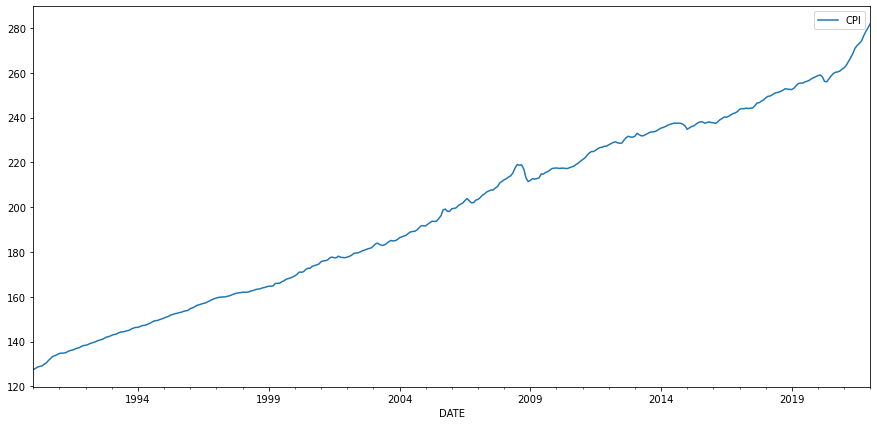

In [3]:
# Visualize datast to see if there is a trend.
# If trend exists use differencing.

df.plot()

In [4]:
# Using Augmented Dickey-Fuller test to confirm if data is stationary.  P-value < .05

result=adfuller(df['CPI'])
dict(zip(['adf', 'pvalue', 'usedlag', 'nobs', 'critical' 'values', 'icbest'],result))

{'adf': 1.4114557004733983,
 'pvalue': 0.9971655669759869,
 'usedlag': 15,
 'nobs': 369,
 'criticalvalues': {'1%': -3.448196541708585,
  '5%': -2.869404683789669,
  '10%': -2.5709597356805545},
 'icbest': 520.2472817964301}

{'adf': -2.7601718894578764,
 'pvalue': 0.06419199115834438,
 'usedlag': 14,
 'nobs': 369,
 'criticalvalues': {'1%': -3.448196541708585,
  '5%': -2.869404683789669,
  '10%': -2.5709597356805545},
 'icbest': 519.7327753590616}

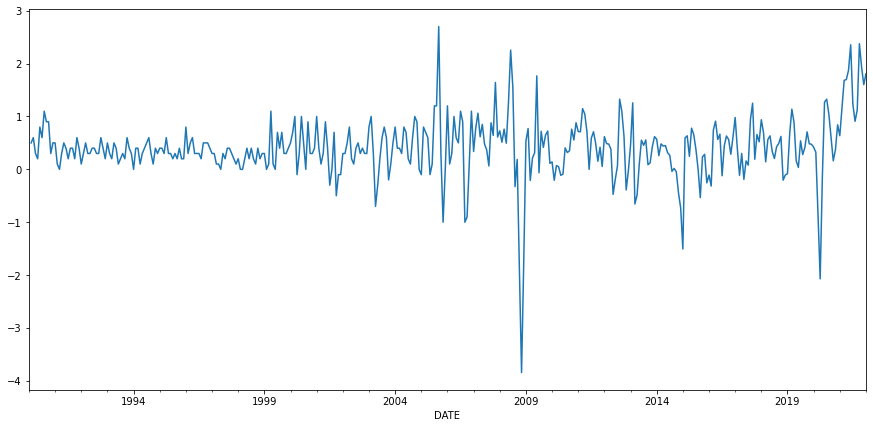

In [5]:
# Differencing the values converts the dataset from non-stationary to stationary. Goal P-value < .05
# Will be used to update d value in the p,d,q 

df['1difference']=df['CPI']-df['CPI'].shift(1)
 
df['1difference'].plot()

result=adfuller((df['1difference']).dropna())
dict(zip(['adf', 'pvalue', 'usedlag', 'nobs', 'critical' 'values', 'icbest'],result))

{'adf': -8.963586702214943,
 'pvalue': 8.100761514382056e-15,
 'usedlag': 13,
 'nobs': 369,
 'criticalvalues': {'1%': -3.448196541708585,
  '5%': -2.869404683789669,
  '10%': -2.5709597356805545},
 'icbest': 524.8851642147852}

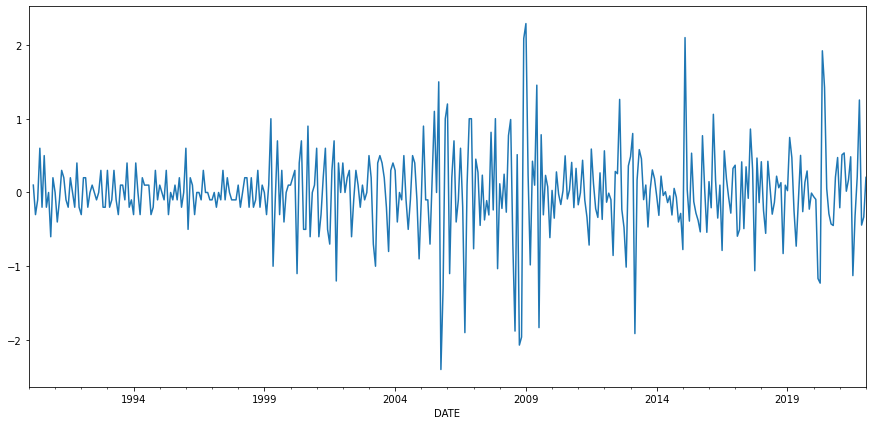

In [6]:
# Second Difference
# Will be used to update d value in the p,d,q 

df['2difference']=df['1difference']-df['1difference'].shift(1)
 
df['2difference'].plot()

result=adfuller((df['2difference']).dropna())
dict(zip(['adf', 'pvalue', 'usedlag', 'nobs', 'critical' 'values', 'icbest'],result))

/Users/ba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


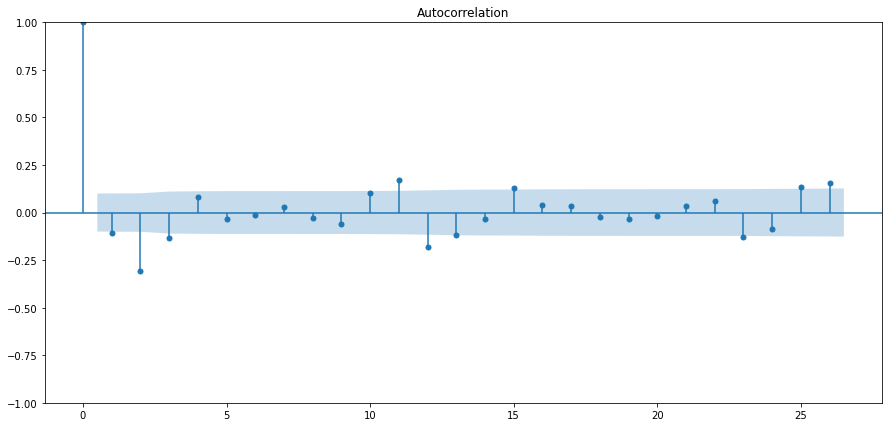

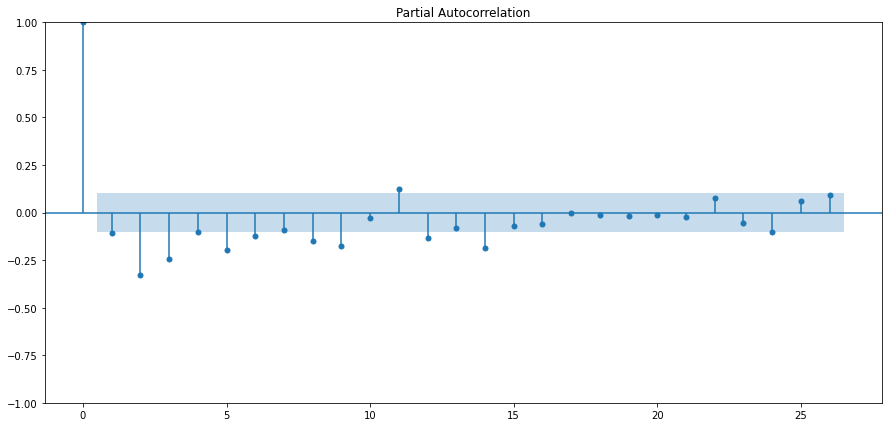

In [7]:
# Visualizing the acf and pacf models to highlight statistical significance (points that go beyond the blue shaded area) 
# ACF model is used to evaluate the MA Model
# PACF model is used to evaluate the AR Model

#Plot ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
 
fig1=plot_acf(df['2difference'].dropna()) 
fig2=plot_pacf(df['2difference'].dropna()) 

In [8]:
# Create an ARIMA model
model = ARIMA(df.CPI.values, order=(6, 2, 3)) #p,d,q

# Fit the model to the data
results = model.fit()

# Print the model summary (View #1)
results.summary()

/Users/ba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/ba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/ba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  385
Model:                 ARIMA(6, 2, 3)   Log Likelihood                -261.804
Date:                Tue, 22 Feb 2022   AIC                            543.607
Time:                        16:15:30   BIC                            583.088
Sample:                             0   HQIC                           559.269
                                - 385                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4905      0.069      7.075      0.000       0.355       0.626
ar.L2         -1.0175      0.078    -13.069      0.000      -1.170      -0.865
ar.L3          0.5555      0.063      8.863      0.000       0.433       0.678
ar.L4         -0.1456      0.091     -1.607      0.108      -0.323       0.032
ar.L5         -0.0139      0.060     -0.231      0.817      -0.132       0.104
ar.L6          0.1118      0.060      1.862      0.063      -0.006       0.230
ma.L1         -0.8367      0.068    -12.374      0.000      -0.969      -0.704
ma.L2          0.7654      0.083      9.172      0.000       0.602       0.929
ma.L3         -0.8495      0.063    -13.550      0.000      -0.972      -0.727
sigma2         0.2333      0.011     20.464      0.000       0.211       0.256
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):               694.20
Prob(Q):                              0.68   Prob(JB):                         0.00
Heteroskedasticity (H):               4.02   Skew:                            -0.83
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:
# Print the model summary (View #2 w/ F-Score)

from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(df['CPI'],order=(6,2,3),seasonal_order=(0, 0, 0, 0))
result=model.fit()

/Users/ba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/ba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/ba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/ba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.69092D-01    |proj g|=  6.72536D-01

At iterate    5    f=  7.07582D-01    |proj g|=  3.91069D-02

At iterate   10    f=  6.95569D-01    |proj g|=  3.91943D-02

At iterate   15    f=  6.91556D-01    |proj g|=  2.72853D-03

At iterate   20    f=  6.91314D-01    |proj g|=  1.33913D-02

At iterate   25    f=  6.90526D-01    |proj g|=  2.98629D-03

At iterate   30    f=  6.90493D-01    |proj g|=  1.29238D-03

At iterate   35    f=  6.90245D-01    |proj g|=  2.36535D-02

At iterate   40    f=  6.88638D-01    |proj g|=  4.23552D-02

At iterate   45    f=  6.83322D-01    |proj g|=  4.15233D-02

At iterate   50    f=  6.80010D-01    |proj g|=  1.51092D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/ba/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:ylabel='Density'>

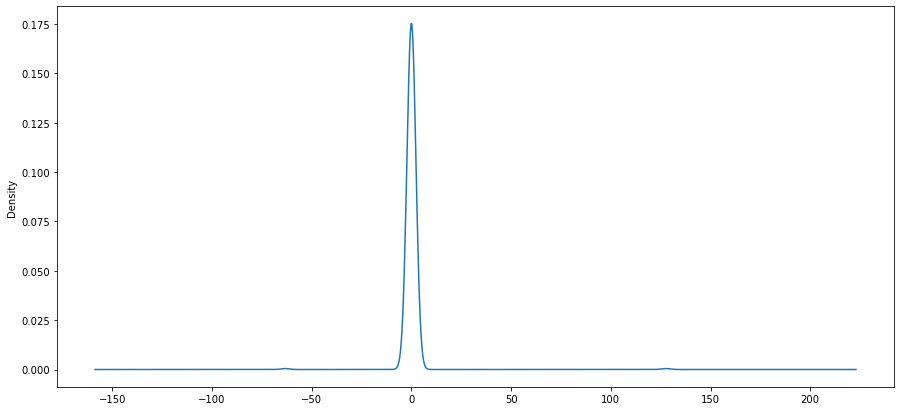

In [10]:
#Plotting residuals show how well the model is fitted.  residuals is the difference between the orginal and predicted values.  

result.resid.plot(kind='kde')

In [11]:
# Create a DataFrame with future dates 

from pandas.tseries.offsets import DateOffset
new_dates=[df.index[-1]+DateOffset(months=x) for x in range(1,13)]
df_pred=pd.DataFrame(index=new_dates,columns =df.columns)
df_pred.head()

,CPI,1difference,2difference
2022-02-01,NaN,NaN,NaN
2022-03-01,NaN,NaN,NaN
2022-04-01,NaN,NaN,NaN
2022-05-01,NaN,NaN,NaN
2022-06-01,NaN,NaN,NaN


,CPI,1difference,2difference,predictions
2021-02-01,263.346,1.146,0.510,NaN
2021-03-01,265.028,1.682,0.536,NaN
2021-04-01,266.727,1.699,0.017,NaN
2021-05-01,268.599,1.872,0.173,NaN
2021-06-01,270.955,2.356,0.484,NaN
2021-07-01,272.184,1.229,-1.127,NaN
2021-08-01,273.092,0.908,-0.321,NaN
2021-09-01,274.214,1.122,0.214,NaN
2021-10-01,276.590,2.376,1.254,NaN
2021-11-01,278.524,1.934,-0.442,NaN


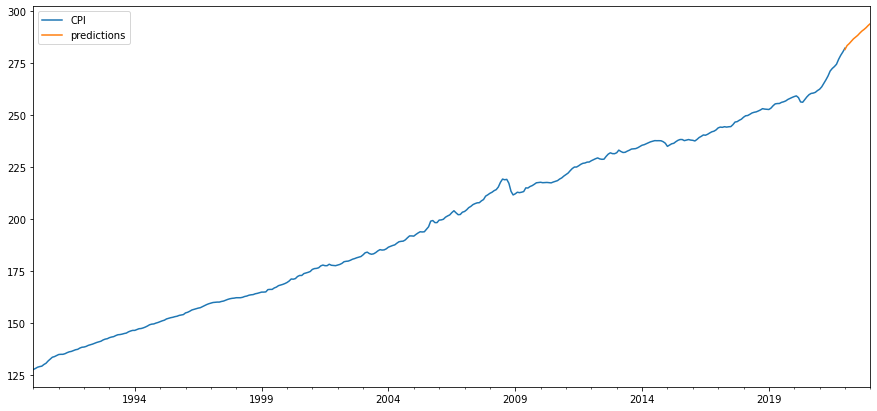

In [12]:
# Final step, Predict.

df2=pd.concat([df,df_pred])
 
 
df2['predictions']=result.predict(start=384,end=401)
df2[['CPI','predictions']].plot()

# Output to CSV and PDF
df2.to_csv('arima_inflation.csv')
plt.savefig('arima_inflation.pdf')

df2.tail(24)

,CPI,1difference,2difference,predictions
2019-02-01,253.135,0.665,0.746,252.689410
2019-03-01,254.273,1.138,0.473,253.865253
2019-04-01,255.163,0.890,-0.248,255.013482
2019-05-01,255.325,0.162,-0.728,255.575306
2019-06-01,255.361,0.036,-0.126,255.524618
2019-07-01,255.900,0.539,0.503,255.680047
2019-08-01,256.179,0.279,-0.260,256.425861
2019-09-01,256.596,0.417,0.138,256.424916
2019-10-01,257.305,0.709,0.292,257.106412
2019-11-01,257.788,0.483,-0.226,257.893983


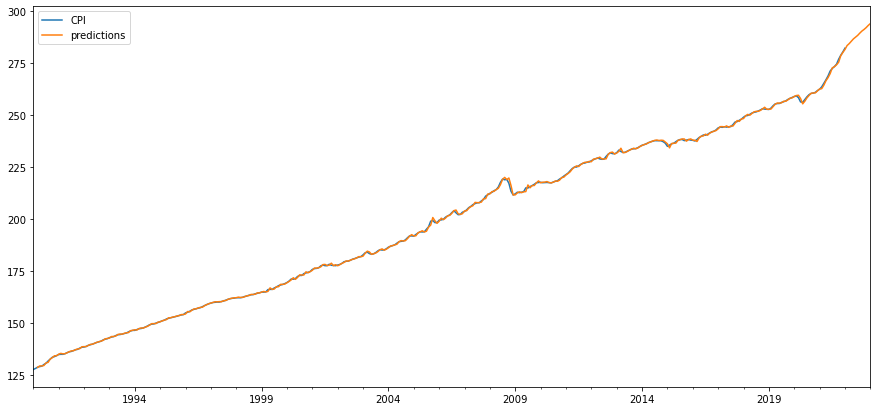

In [13]:
# Final step, Predict.

df2=pd.concat([df,df_pred])
 
 
df2['predictions']=result.predict(start=2,end=401)
df2[['CPI','predictions']].plot()

# Output to CSV and PDF
df2.to_csv('arima_inflation.csv')
plt.savefig('arima_inflation.pdf')

df2.tail(48)